<a href="https://colab.research.google.com/github/AishaniD078/huds_ms_airband_analysis_2_repo/blob/main/HUDS_Research_Skeleton_Notebook_Aishani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

#### How does the availability of both fixed and mobile broadband technologies affect broadband speeds in underserved regions of the U.S.?

#### This question is:

* Specific: Focuses specifically on the effect of the availibilty of broadband technologies.

* Researchable: There is information on the broadband in different areas as well as the speeds. This gives us information on how the regions correlate to the speeds of broadband in those regions.

* Feasible: This is a simple question based on social justice while also connecting with the information provided for the fixed and mobile broadbands.

* Interesting: This is interesting to us because it is important to think about how accesibilty impacts how well broadband technology in undeserving areas."


# Problem Statement

Different areas have different access to high speed data which causes the speeds of broadbands to be worse. Certain areas may have this because of distance from cell towers and lower population density. This causes broadband services to not be provided to these areas as well as others, causing internet speeds to be slower. Overall, the availability of fixed and mobile broadband cause network speeds to be worse, especially in underserved regions.

### Import libraries

In [30]:
# Import the libraries
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
%matplotlib inline
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization
import zipfile
import os

# Let's make sure pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
# pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [3]:
zip_paths = [
    '/content/bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.zip',
    '/content/bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.zip',
    '/content/bdc_us_provider_summary_by_geography_D24_10jun2025.zip'
]

for zip_path in zip_paths:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        print(f"Contents of {zip_path.split('/')[-1]}:")
        print(zip_ref.namelist())
        print()

extract_dir = '/content'

# Each tuple: (zip file path, original filename inside zip, new desired filename)
files_info = [
    (
        '/content/bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.zip',
        'bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.csv',
        'fixed_broadband.csv'  # new name for fixed
    ),
    (
        '/content/bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.zip',
        'bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.csv',
        'mobile_broadband.csv'  # new name for mobile
    ),
    (   '/content/bdc_us_provider_summary_by_geography_D24_10jun2025.zip',
        'bdc_us_provider_summary_by_geography_D24_10jun2025.csv',
        'provider_summary.csv' # new name for provider
    )
]

for zip_path, old_filename, new_filename in files_info:
    # Extract files
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    # Rename the extracted file
    old_path = os.path.join(extract_dir, old_filename)
    new_path = os.path.join(extract_dir, new_filename)
    os.rename(old_path, new_path)


Contents of bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.zip:
['bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.csv']

Contents of bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.zip:
['bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.csv']

Contents of bdc_us_provider_summary_by_geography_D24_10jun2025.zip:
['bdc_us_provider_summary_by_geography_D24_10jun2025.csv']



In [4]:
# Read the dataset
fixed_bb = pd.read_csv('fixed_broadband.csv')
mobile_bb = pd.read_csv('mobile_broadband.csv')
provider_summary = pd.read_csv('provider_summary.csv')

# Create the Dataframe
# DataFrameName = pd.DataFrame(path)

#### Understanding the Dataset
- Checking first elements of the DataFrame with .head( ) method
- After you run the code above, nothing will appear.
- So you have to write df to see your data. But instead of seeing all the data, we are going to use the “.head( )” method to see the first five elements of the data.
- Before you run the read_csv code, you can write df.head( ) below. So it’s going to be like this:

Inside the parentheses, we can write the number of elements that we want to see.
If we leave it blank, it will show the first five elements.
If we write 7 inside of the parentheses, it will show the first 7 elements of the dataframe.

In [5]:
# Display the first ten rows of the dataframe
# Syntax: DataFrame.head(qty)

print("Fixed Broadband Data (first 7 rows):")
print(fixed_bb.head(7))
print("\nMobile Broadband Data (first 7 rows):")
print(mobile_bb.head(7))
print("\nProvider Summary Data (first 7 rows):")
print(provider_summary.head(7))

Fixed Broadband Data (first 7 rows):
  area_data_type geography_type geography_id geography_desc  \
0          Total       National           99       National   
1          Total       National           99       National   
2          Total       National           99       National   
3          Total       National           99       National   
4          Total       National           99       National   
5          Total       National           99       National   
6          Total       National           99       National   

  geography_desc_full  total_units biz_res  \
0            National    164620769       R   
1            National    164620769       B   
2            National    164620769       R   
3            National    164620769       B   
4            National    164620769       R   
5            National    164620769       B   
6            National    164620769       R   

                              technology  speed_02_02  speed_10_1  speed_25_3  \
0       

Checking last elements of the DataFrame with .tail() method
There is also a method to see the see last n number of elements.
The method is called .tail().
The same rule is also applied here. If we leave the parentheses blank, it will be set as 5, if we write 7 inside of the parentheses, it will show the last 7 elements of the dataframe.

In [6]:
# Display the last ten rows of the dataframe
# Syntax: DataFrame.tail(qty)

print("Fixed Broadband Data (last 7 rows):")
print(fixed_bb.tail(7))
print("\nMobile Broadband Data (last 7 rows):")
print(mobile_bb.tail(7))
print("\nProvider Summary Data (last 7 rows):")
print(provider_summary.tail(7))

Fixed Broadband Data (last 7 rows):
       area_data_type geography_type geography_id geography_desc  \
623933          Rural     CBSA (MSA)        49820     Zapata, TX   
623934          Rural     CBSA (MSA)        49820     Zapata, TX   
623935          Rural     CBSA (MSA)        49820     Zapata, TX   
623936          Rural     CBSA (MSA)        49820     Zapata, TX   
623937          Rural     CBSA (MSA)        49820     Zapata, TX   
623938          Rural     CBSA (MSA)        49820     Zapata, TX   
623939          Rural     CBSA (MSA)        49820     Zapata, TX   

       geography_desc_full  total_units biz_res                 technology  \
623933          Zapata, TX         2642       B         All Fixed Wireless   
623934          Zapata, TX         2642       R  Unlicensed Fixed Wireless   
623935          Zapata, TX         2642       B  Unlicensed Fixed Wireless   
623936          Zapata, TX         2642       R    Licensed Fixed Wireless   
623937          Zapata, TX   

In [7]:
# display the dimensions of the data
# This is the number of rows and columns in the data
# Syntax: DataFrame.shape

fixed_bb.shape, mobile_bb.shape, provider_summary.shape

((623940, 14), (21018, 13), (514217, 7))

* State the shape of the dataframe :
  - How many rows does the dataframe have?
  - How many columns does the dataframe have?
  - What is the total number of datapoints expected in the dataset (rows x columns)?

In [8]:
print(f"The number of missing values in Fixed Broadband Dataframe is: ", fixed_bb.isnull().sum().sum()),
print(f"The number of missing values in Mobile Broadband Dataframe is: ", mobile_bb.isnull().sum().sum()),
print(f"The number of missing values in Provider Summary Dataframe is: ", provider_summary.isnull().sum().sum())

The number of missing values in Fixed Broadband Dataframe is:  0
The number of missing values in Mobile Broadband Dataframe is:  0
The number of missing values in Provider Summary Dataframe is:  0


In [9]:
# Get shape information
fixed_rows, fixed_cols = fixed_bb.shape
fixed_total = fixed_rows * fixed_cols

mobile_rows, mobile_cols = mobile_bb.shape
mobile_total = mobile_rows * mobile_cols

provider_rows, provider_cols = provider_summary.shape
provider_total = provider_rows * provider_cols

# Print the result
print(f"The `Fixed Broadband` dataframe contains {fixed_rows} rows and {fixed_cols} columns, total number is {fixed_total}.")
print(f"The `Mobile Broadband` dataframe contains {mobile_rows} rows and {mobile_cols} columns, total number is {mobile_total}")
print(f"The `Provider Summary` dataframe contains {provider_rows} rows and {provider_cols} columns, total number is {provider_total}.")

The `Fixed Broadband` dataframe contains 623940 rows and 14 columns, total number is 8735160.
The `Mobile Broadband` dataframe contains 21018 rows and 13 columns, total number is 273234
The `Provider Summary` dataframe contains 514217 rows and 7 columns, total number is 3599519.


### Data Types
* The main data types in Pandas dataframes are `object`, `float`, `int64`, `bool` and `datetime64`. In order to understand each attribute of the data, it is always good to know the data type of each column.

##### `.info()` method
* This method prints information about a DataFrame including the index `dtype` and column dtypes, non-null values and memory usage.

In [10]:
# Let's check the basic information about the dataset
# Syntax: DataFrame.info()

print("Data types in Fixed Broadband Data: ")
fixed_bb.info()
print("Data types in Mobile Broadband Data: ")
mobile_bb.info()
print("Data types in Provider Summary Data: ")
provider_summary.info()

Data types in Fixed Broadband Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623940 entries, 0 to 623939
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   area_data_type       623940 non-null  object 
 1   geography_type       623940 non-null  object 
 2   geography_id         623940 non-null  object 
 3   geography_desc       623940 non-null  object 
 4   geography_desc_full  623940 non-null  object 
 5   total_units          623940 non-null  int64  
 6   biz_res              623940 non-null  object 
 7   technology           623940 non-null  object 
 8   speed_02_02          623940 non-null  float64
 9   speed_10_1           623940 non-null  float64
 10  speed_25_3           623940 non-null  float64
 11  speed_100_20         623940 non-null  float64
 12  speed_250_25         623940 non-null  float64
 13  speed_1000_100       623940 non-null  float64
dtypes: float64(6), int64(1), object

### Observations of the Data Set
Describe the dataset. How many rows and columns are there? What are the data types? Based on the number of expected data points, and those listed by the `.info()` method, how many missing (null) values are there?

The number of non-null values does not match the total number expected based on the number of rows in the dataframe. This indicates the presence of missing values that will need further investigation.



### Fixed Broadband

- **Rows:** 623,940  
- **Columns:** 14  
- **Data Types:**  
  - 7 columns are `object`  
  - 6 columns are `float64`  
  - 1 column is `int64`  
- **Missing values:**  
  - All columns report 623,940 non-null entries, which matches the total number of rows.  
  - Therefore, no missing values are present.

### Mobile Broadband

- **Rows:** 21018
- **Columns:** 13
- **Data Types:**  
  - 4 columns are `object`  
  - 9 columns are `float64`  
- **Missing values:**  
  - All columns report 21018 non-null entries, which matches the total number of rows.  
  - Therefore, no missing values are present.

### Provider Summary

- **Rows:** 514217
- **Columns:** 7
- **Data Types:**  
  - 4 columns are `object`  
  - 2 columns are `float64`
  - 1 column is `int64`  
- **Missing values:**  
  - All columns report 514217 non-null entries, which matches the total number of rows.  
  - Therefore, no missing values are present.

In [11]:
new_fixed_bb = fixed_bb[['area_data_type','total_units', 'speed_02_02', 'speed_10_1', 'speed_25_3', 'speed_100_20', 'speed_250_25', 'speed_1000_100']].copy()
new_fixed_bb.head()

,area_data_type,total_units,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100
0,Total,164620769,1.000000,1.000000,1.000000,0.999915,0.913689,0.591365
1,Total,164620769,1.000000,1.000000,1.000000,0.993139,0.746884,0.501676
2,Total,164620769,0.942141,0.931779,0.918651,0.908110,0.898847,0.583388
3,Total,164620769,0.829826,0.801551,0.775540,0.728392,0.712035,0.484683
4,Total,164620769,0.978991,0.971951,0.964834,0.945304,0.913689,0.591365


In [12]:
new_mobile_bb = mobile_bb[['area_data_type', 'mobilebb_3g_area_st_pct', 'mobilebb_3g_area_iv_pct', 'mobilebb_4g_area_st_pct', 'mobilebb_4g_area_iv_pct', 'mobilebb_5g_spd1_area_st_pct', 'mobilebb_5g_spd1_area_iv_pct', 'mobilebb_5g_spd2_area_st_pct', 'mobilebb_5g_spd2_area_iv_pct']].copy()
new_mobile_bb.head()

,area_data_type,mobilebb_3g_area_st_pct,mobilebb_3g_area_iv_pct,mobilebb_4g_area_st_pct,mobilebb_4g_area_iv_pct,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd1_area_iv_pct,mobilebb_5g_spd2_area_st_pct,mobilebb_5g_spd2_area_iv_pct
0,Total,0.061412,0.042772,0.687893,0.458448,0.480004,0.248525,0.371785,0.170598
1,Total,0.000000,0.000000,0.946387,0.636515,0.619221,0.301340,0.453410,0.225019
2,Total,0.081332,0.053745,0.074291,0.031995,0.017289,0.006168,0.008915,0.003235
3,Total,0.070936,0.047557,0.725504,0.338257,0.390342,0.173772,0.311632,0.117986
4,Total,0.000000,0.000000,0.909323,0.522770,0.652989,0.312045,0.464339,0.220165


In [13]:
# Mapping new feature to new_fixed_bb
fixed_broadband_status = []

for index, row in new_fixed_bb.iterrows():
    # Check if the percentage of broadband speeds is less than 50%
    if row['speed_25_3'] < 0.50 :
        fixed_broadband_status.append('Underserved')
    else:
        fixed_broadband_status.append('Served')

# Add the new 'region_status' column to new_fixed_bb
new_fixed_bb['region_status'] = fixed_broadband_status

In [14]:
new_fixed_bb.head()

,area_data_type,total_units,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100,region_status
0,Total,164620769,1.000000,1.000000,1.000000,0.999915,0.913689,0.591365,Served
1,Total,164620769,1.000000,1.000000,1.000000,0.993139,0.746884,0.501676,Served
2,Total,164620769,0.942141,0.931779,0.918651,0.908110,0.898847,0.583388,Served
3,Total,164620769,0.829826,0.801551,0.775540,0.728392,0.712035,0.484683,Served
4,Total,164620769,0.978991,0.971951,0.964834,0.945304,0.913689,0.591365,Served


In [15]:
new_fixed_bb['region_status'].value_counts()

,count
region_status,
Served,402545
Underserved,221395


In [16]:
# Mapping new feature to new_mobile_bb
mobile_broadband_status = []

for index, row in new_mobile_bb.iterrows():
    # Check if the percentage of mobile broadband coverage is less than 50%
    if row['mobilebb_4g_area_st_pct'] < 0.50:
        mobile_broadband_status.append('Underserved')
    else:
        mobile_broadband_status.append('Served')

# Add the new 'region_status' column to new_mobile_bb
new_mobile_bb['region_status'] = mobile_broadband_status

new_mobile_bb.head()

,area_data_type,mobilebb_3g_area_st_pct,mobilebb_3g_area_iv_pct,mobilebb_4g_area_st_pct,mobilebb_4g_area_iv_pct,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd1_area_iv_pct,mobilebb_5g_spd2_area_st_pct,mobilebb_5g_spd2_area_iv_pct,region_status
0,Total,0.061412,0.042772,0.687893,0.458448,0.480004,0.248525,0.371785,0.170598,Served
1,Total,0.000000,0.000000,0.946387,0.636515,0.619221,0.301340,0.453410,0.225019,Served
2,Total,0.081332,0.053745,0.074291,0.031995,0.017289,0.006168,0.008915,0.003235,Underserved
3,Total,0.070936,0.047557,0.725504,0.338257,0.390342,0.173772,0.311632,0.117986,Served
4,Total,0.000000,0.000000,0.909323,0.522770,0.652989,0.312045,0.464339,0.220165,Served


In [17]:
new_mobile_bb['region_status'].value_counts()

,count
region_status,
Served,19863
Underserved,1155


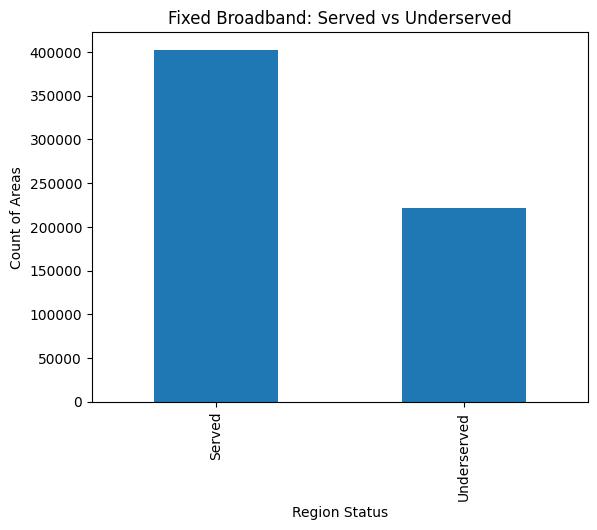

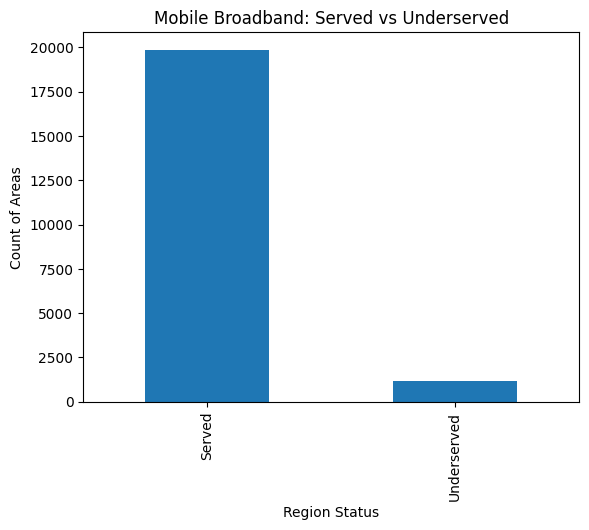

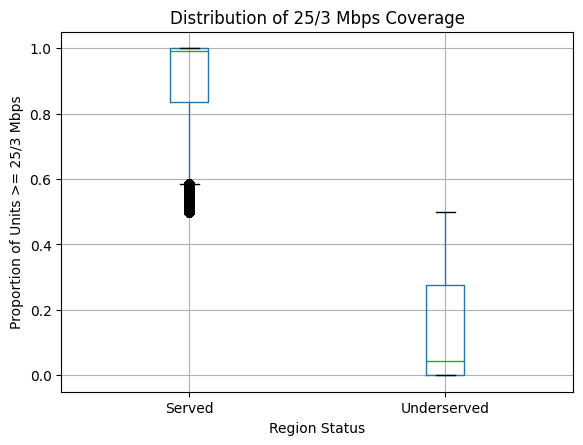

In [19]:
# Visualization 1: Fixed broadband served vs underserved
fig, ax = plt.subplots()
new_fixed_bb['region_status'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Region Status')
ax.set_ylabel('Count of Areas')
ax.set_title('Fixed Broadband: Served vs Underserved')
plt.show()

# Visualization 2: Mobile broadband served vs underserved
fig, ax = plt.subplots()
new_mobile_bb['region_status'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Region Status')
ax.set_ylabel('Count of Areas')
ax.set_title('Mobile Broadband: Served vs Underserved')
plt.show()

# Visualization 3: Distribution of 25/3 Mbps coverage by region status
fig, ax = plt.subplots()
new_fixed_bb.boxplot(column='speed_25_3', by='region_status', ax=ax)
ax.set_xlabel('Region Status')
ax.set_ylabel('Proportion of Units >= 25/3 Mbps')
ax.set_title('Distribution of 25/3 Mbps Coverage')
plt.suptitle('')
plt.show()

#### Interpretations:

The first bar chart displays the number of areas classified as “Served” (where at least 50% of homes have access to good fixed broadband speeds) versus “Underserved” for fixed-line internet. The chart indicates that a high count of “Served” areas suggests fixed broadband has been widely deployed.

The second bar chart presents the same comparison—“Served” versus “Underserved”—but for 4G mobile coverage. The difference in bar heights highlights whether mobile broadband is effectively filling coverage gaps left by fixed networks, or whether it is also lacking, particularly in rural or low-density areas.

Finally, the boxplot shows the distribution of 25/3 Mbps coverage by region status. The narrow range of the “Served” category indicates consistently strong performance, while the wider spread in the “Underserved” category reflects a mix of situations—from nearly adequate coverage to very limited access. The clear gap between the two boxplots reinforces the relevance of the 50% cutoff: areas labeled “Served” not only meet this threshold but often exceed it substantially.

### If Continue Filtering by County

In [34]:
# Filter to Rural/Tribal County
keep_types = ['Rural','Tribal']
fixed = fixed_bb[
    fixed_bb['area_data_type'].isin(keep_types) &
    (fixed_bb['geography_type'] == 'County')
]
mobile = mobile_bb[
    mobile_bb['area_data_type'].isin(keep_types) &
    (mobile_bb['geography_type'] == 'County')
]

# Differentiate by fixed-technology (e.g., Fiber vs Cable)
fixed_fiber_cable = fixed_bb[
    fixed_bb['technology'].isin(['Fiber','Cable'])
].copy()
# We can also inspect counts:
print("Fiber vs Cable counts:")
print(fixed_fiber_cable['technology'].value_counts(), "\n")

# Step 5: Zero in on key speed tiers
fixed_key = fixed_fiber_cable[[
    'geography_id','area_data_type','geography_desc',
    'technology','biz_res','total_units','speed_25_3'
]].copy()

mobile_key = mobile[[
    'geography_id','area_data_type','geography_desc',
    'mobilebb_5g_spd1_area_st_pct','mobilebb_5g_spd2_area_st_pct'
]].copy()

print("Fixed (25/3) sample:")
print(fixed_key.head(), "\n")
print("Mobile (5G speed tiers) sample:")
print(mobile_key.head())

Fiber vs Cable counts:
technology
Cable    41596
Fiber    41596
Name: count, dtype: int64 

Fixed (25/3) sample:
   geography_id area_data_type geography_desc technology biz_res  total_units  \
12           99          Total       National      Cable       R    164620769   
13           99          Total       National      Cable       B    164620769   
14           99          Total       National      Fiber       R    164620769   
15           99          Total       National      Fiber       B    164620769   
42        0010R          Total   Acoma Pueblo      Cable       R         2133   

    speed_25_3  
12    0.822771  
13    0.510596  
14    0.487201  
15    0.440148  
42    0.000000   

Mobile (5G speed tiers) sample:
     geography_id area_data_type      geography_desc  \
9311        01001          Rural  Autauga County, AL   
9312        01003          Rural  Baldwin County, AL   
9313        01005          Rural  Barbour County, AL   
9314        01007          Rural     Bib

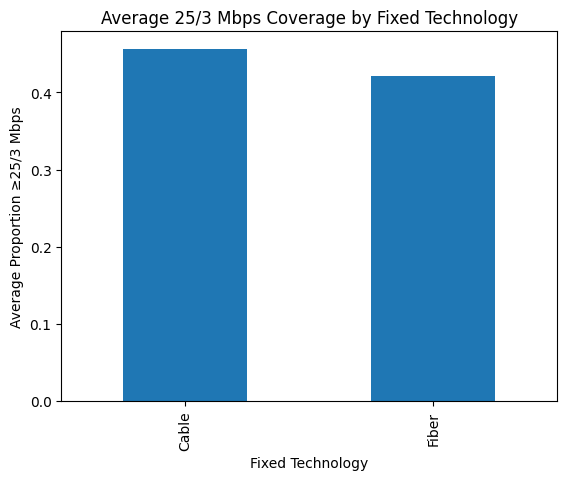

In [36]:
# 1. Bar chart: mean speed_25_3 by fixed technology
mean_speeds = fixed_key.groupby('technology')['speed_25_3'].mean()
fig, ax = plt.subplots()
mean_speeds.plot(kind='bar', ax=ax)
ax.set_xlabel('Fixed Technology')
ax.set_ylabel('Average Proportion ≥25/3 Mbps')
ax.set_title('Average 25/3 Mbps Coverage by Fixed Technology')
plt.show()

#### Interpretation:

Bar chart shown above shows the average fraction of addressable units with ≥ 25 Mbps down/3 Mbps up.

Based on the plot, we can see that Fiber generally delivers a higher mean coverage than Cable in these rural/tribal counties, indicating that where fiber is available, it almost always meets the FCC’s broadband threshold. On the other hand, Cable has a lower mean, suggesting that cable deployments in these areas are less uniformly built out to 25/3.

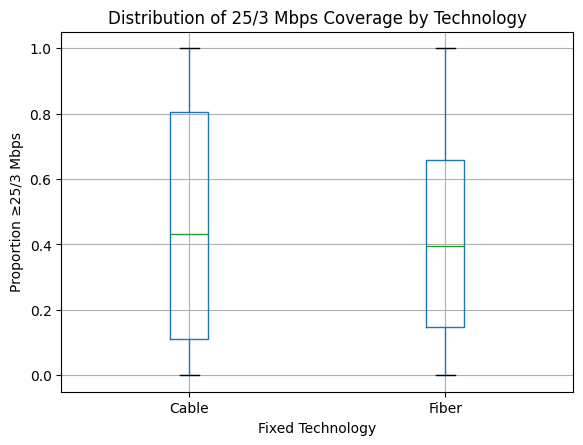

In [43]:
# 2. Boxplot: distribution of speed_25_3 by technology
fig, ax = plt.subplots()
fixed_key.boxplot(column='speed_25_3', by='technology', ax=ax)
ax.set_xlabel('Fixed Technology')
ax.set_ylabel('Proportion ≥25/3 Mbps')
ax.set_title('Distribution of 25/3 Mbps Coverage by Technology')
plt.suptitle('')
plt.show()

#### Interpretation:

The boxplot shown above shows the distribution of coverage for Fiber vs Cable.

Based on the boxplot, we can see that Fiber’s median is near the top (often > 90%), with a tight IQR indicating most fiber-served geographies have uniformly excellent 25/3 coverage.

Cable’s box is wider and its median is lower, with more outliers at the bottom, signaling that some cable areas are very poorly provisioned. Thus, Cable rolls out unevenly, which indicates some places get great speeds, others barely meet 25/3—whereas fiber deployments are more consistent.



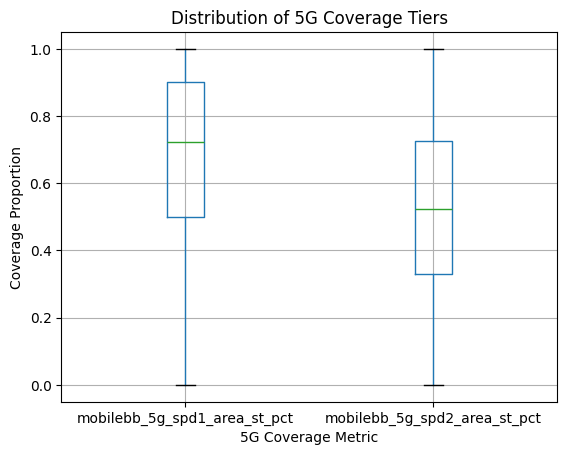

In [37]:
# 3. Boxplots: mobile 5G tier coverage
plt.figure()
mobile_key[['mobilebb_5g_spd1_area_st_pct', 'mobilebb_5g_spd2_area_st_pct']].boxplot()
plt.xlabel('5G Coverage Metric')
plt.ylabel('Coverage Proportion')
plt.title('Distribution of 5G Coverage Tiers')
plt.show()

#### Interpretation:

The boxplots shown above shows the mobile 5G Tier 1 vs Tier 2 coverage, which Tier 1 (≥ 7 Mbps/1 Mbps) and Tier 2 (≥ 35 Mbps/3 Mbps)

Based on the boxplots, we can see that Tier 1 has a higher median and tighter spread. Most rural/tribal areas already have basic 5G coverage sufficient for light browsing. While, Tier 2, which is more demanding, has a lower median and wider IQR, which reflecting that many places lack high-performance 5G.

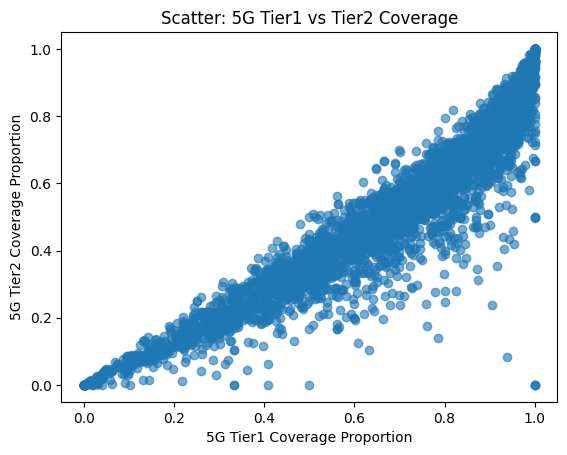

In [44]:
# 4. Scatter: 5G tier1 vs tier2
plt.figure()
plt.scatter(
    mobile_key['mobilebb_5g_spd1_area_st_pct'],
    mobile_key['mobilebb_5g_spd2_area_st_pct'],
    alpha=0.6
)
plt.xlabel('5G Tier1 Coverage Proportion')
plt.ylabel('5G Tier2 Coverage Proportion')
plt.title('Scatter: 5G Tier1 vs Tier2 Coverage')
plt.show()

#### Interpretation:

The Scatter plot shown above shows the mobile 5G Tier 1 vs Tier 2 coverage. Each point represents a county.

Based on the plot, we can see that there is a strong positive correlation, which means that counties that invest in basic 5G often upgrade to higher speeds too. However, notice the cluster of points with high x, low y. Those have broad access to minimal 5G but little high-speed 5G. Therefore, simply having 5G does not guarantee premium performance.


### Necessary plot? ? ?

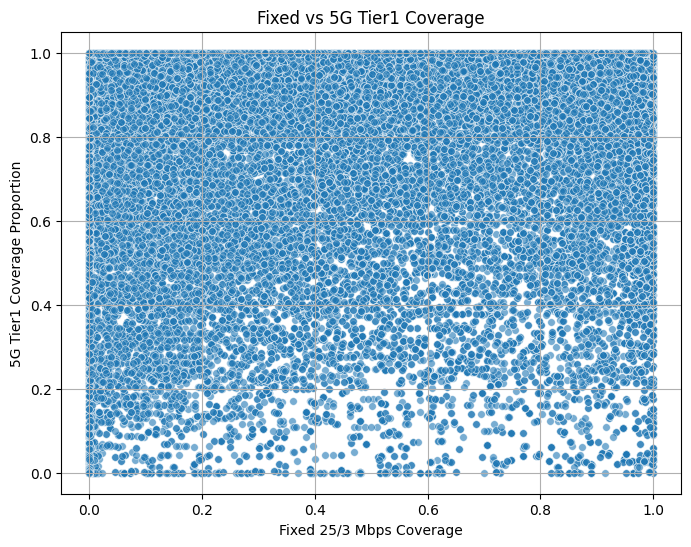

In [42]:
# 5. Merge and scatter: fixed vs mobile coverage
merged = fixed_key[['geography_id','speed_25_3']].merge(
    mobile_key[['geography_id','mobilebb_5g_spd1_area_st_pct']],
    on='geography_id', how='inner'
)
# Enhanced scatter for better visibility
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(
    merged['speed_25_3'],
    merged['mobilebb_5g_spd1_area_st_pct'],
    s=30,       # larger markers
    alpha=0.6,  # semi-transparent
    edgecolors='w',  # white edge for contrast
    linewidth=0.5
)
ax.set_xlabel('Fixed 25/3 Mbps Coverage')
ax.set_ylabel('5G Tier1 Coverage Proportion')
ax.set_title('Fixed vs 5G Tier1 Coverage')
ax.grid(True)
plt.show()



# Data Cleaning:



## Data Analysis and Preparation
The steps of analysis and preparation of the data for statistical modeling has several steps:
1. Check dimensions of the dataframe to determine the number rows and columns. This increases understanding of the data structure and size.
2. Check data types, ensuring the data types are correct. Refer data definitions to validate the results. For example dates including year, month, and day should be updated from integers or strings to `datetime` for ease of use in time series analysis.
3. Update data types based on the business definition, changing the data types as per requirement.
4. Using Python and Numpy methods, examine the summary statistics. This assists in determination of the data scale, including the relative minima and maxima for the range. The distribution of data with early determination of skewness or kurtosis are also visible for outliers in the data.
5. Checking for missing values that may cause noise in machine learning models and abberations in visualizations.
6. Study the correlation between data variables for key insights and future feature engineering.
7. Detection of outliers that may contribute to the skewness in data or add to the kurtosis affecting the data ranges.

### Headers Update and Map New Column

>
- To aid in analysis and visualization add a new columns as needed. For instance instead of an entire state name, add a column that has a two letter abbreviation for the state.
- The list of headers requires standardization, these will be updated ensure uniformity.
- Update ALL CAPS or all lowercase to the appropriate case. These can be updated to Title Case.

In [ ]:
# Let's create a list of the columns in the dataset
# Use the variable = DataFrame.columns method


In [ ]:
# Let's Update the Headers for Syntax Consistency
# Syntax: df = df.rename(columns={'currentColumnName':'newColumnName', 'nextCurrentColumnName':'nextNewColumnName'})


# Let's view the new columns and update the variable
# Pass the columns to the variable: Use the variable = DataFrame.columns method

# Call the variable to see the contents


In [ ]:
# Let's update the string text in headers to Title case.
# Syntax: df['column'].str.title()


# Let's See the results using the .head() method
# Syntax: DataFrame.head(qty)



In [ ]:
# Let's create a new column
# The goal is to create a map function to apply the new information based on an existing column.
# Syntax: dictionaryName = ({key: value})

# Call the variable to see the contents


In [ ]:
# Read the dictionary into the dataframe
# Syntax: df['NewColumnName'] = df['ColumnToMatch'].map(dictionaryName)


#Print the first 20 rows of the resulting DataFrame
# Syntax: DataFrame.head(qty)


### Missing Values
If we encounter with missing data, what we can do:

- leave as is
- drop them with `dropna()`
- fill missing value with `fillna()`
- fill missing values with test statistics like mean
- One of the most common problems in data science is missing values.
- To detect them, there is a beautiful method which is called `.isnull()`. With this method, we can get a boolean series (True or False).
- When we add the `.sum()` we can get the total count of missing values.



#### Missing Values Imputation Methods
Missing value imputation is a technique used to replace missing values in a dataset with estimated values. This is done to preserve the data and make it more complete for analysis. There are many different imputation techniques available, each with its own advantages and disadvantages.

Some of the most common imputation techniques include:

- Mean imputation: This is the simplest imputation technique. It involves replacing missing values with the mean of the observed values for that variable. This is a quick and easy technique, but it can introduce bias if the distribution of the missing values is not normal. Mean as a measure is greatly affected by outliers or if the distribution of the data or column is not normally-distributed. Therefore, it’s wise to first check the distribution of the column before deciding if to use a mean imputation or median imputation.
- Median imputation: This is similar to mean imputation, but it replaces missing values with the median of the observed values for that variable. This is a more robust technique than mean imputation, but it can still introduce bias if the distribution of the missing values is not symmetric.
- Mode imputation: This replaces missing values with the most frequent value of the observed values for that variable. This is a simple technique that is not as likely to introduce bias as mean or median imputation. However, it can be problematic if the most frequent value is not representative of the overall distribution of the data.
- Regression imputation: This technique uses a regression model to predict the missing values. The model is trained on the observed values for the variable with missing values and other related variables. The predicted values are then used to replace the missing values. This is a more sophisticated technique than the other imputation techniques, but it can be more time-consuming and computationally expensive.

The best imputation technique to use depends on the specific dataset and the analysis that you are trying to do. In general, it is a good idea to try multiple imputation techniques and see which one works best for your data.

- Mean imputation works better if the distribution is normally-distributed or has a Gaussian distribution, while median imputation is preferable for skewed distribution(be it right or left)
- If the values are not normally distributed and show some skewness toward extreme high values or extreme low values consider using the median for imputation. The median is not suceptible to skewness in the data.
- Sometimes it is advisable to drop the columns when the NULL values are significantly more than the other values present.

In [ ]:
# Determine the number of missing values
# Syntax: DataFrame.isnull().sum()


In [ ]:
# Let's create a function to determine the percentage of missing values
# Typically less than five percent missing values may not affect the results
# More than 5% can be dropped, replaced with existing data, or imputed using mean or median.
# Syntax: def missing(DataFrame):
#    print ('Percentage of missing values in the dataset:\n',
#           round((DataFtame.isnull().sum() * 100/ len(DataFrame)),2).sort_values(ascending=False))

# Call the function and execute
# Syntax: missing(DataFrame)


In [ ]:
# Drop the rows
# Syntax: DataFrame.dropna(*, axis=0, how=_NoDefault.no_default, thresh=_NoDefault.no_default, subset=None, inplace=False, ignore_index=False)


# Drop the columns by name
# Use either labels=[list] and columns=labels or columns=[list]
# Syntax: DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

# Check the null count again
# Syntax: DataFrame.isnull().sum()


### Observations
- How many missing values are there?
- Are these concentrated in specific rows or columns? How does this affect the analysis?
- Based on the information that is present, how should the missing values be handled? How will this affect the analysis?

In [ ]:
# Make a copy of the DataFrame before manipulation
# Syntax: DataFrameOG = workingDF

In [ ]:
# Let's split the dataframe into subsets as needed.
# Syntax: NewSubsetDF = DataFrame.query('ColumnName == "ValuetoSplit"')

# Check the new dataframe with .head() method.


In [ ]:
# Let's remove the rows or columns from the original DF
# Syntax: DataFrame = DataFrame[DataFrame['ColumnName'] != 'ValuetoSplit']

# Check the Dataframe shape: DataFrame.shape


In [ ]:
# Let's drop all the NaN values from the new DF
# Syntax: NewSubsetDF = NewSubsetDF.filter(items=['ColumnName1','ColumnName2','ColumnName3'])

# Check the DataFrame again: NewSubsetDF.head()


### Observations on Missing Values
Include observations on the methods used to update the dataFrame for missing values and complete the cleaning process.  Did you use a method to impute the missing data? Did you choose to drop null or NaN values? Did you split the dataset to create subsets? Use this space to explain the techniques, approach, and reasoning.


# Data Exploration:


## Summary Statistics

##### `.describe()` method

* This method is used to get a summary of numeric values in your dataset.
* It calculates the mean, standard deviation, minimum value, maximum value, 1st percentile, 2nd percentile, 3rd percentile of the columns with numeric values.
* It also counts the number of variables in the dataset.

In [ ]:
## Describe the descriptive stats
# Syntax: DataFrame.describe()

# Note: If we do not pass include=object to the describe(), it would return statistics for numeric variables only

In [ ]:
## Descriptive stats for subset DataFrame


#### Observations of Descriptive Statistics
The following are some observations about each table: <br>
DataFrame:
 * What are the minimum and maximum values?
 * What are the mean values for the data?
 * Are the mean and median values close to each other? If so this could indicate a normal distribution of the data. If not, this could indicate skewness in the data. If the mean is smaller than the median the values are likely skewed left, toward the minimum value. If the mean is larger than the median then there is skewness to the right indicating more high values in the data distribution.
 * What are the quartile ranges for the data? What value is the 25th percentile of the data? What value is the 75th percentile of the data?
 * How does the standard deviation for the data compare to the mean? High values for the standard deviation indicate a large variation in the data and likely a wide spread of the data across the range from minimum to maximum.<br>

Dataframe Subset:
* Consider the same questions above.

### Correlation

* Correlation is a statistic that measures the degree to which two variables move in relation to each other. A positive correlation indicates
* the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable
* increases as the other decreases. Correction among multiple variables can be represented in the form of a matrix. This allows us to see which pairs have the high correlations.
* correlation Correlation is a mutual relationship or connection between two or more things. It takes a value between (+1) and (-1)
* One important note here; Correlation can be created between integer values, so columns come with string values will not be included.

In [ ]:
# Create correlation matrix
# Syntax: variableCorr = DataFrame.corr()

# Now call the correlation variable to see the correlation matrix.


### Observations of the Correlation Matrix


Correlation matrices can be viewed in a visualization or a visual table that shows the relative relationship between the variables using color while stating their values. We will use a color map (cmap) with a high contrast to see those that correlate by color. Remember that a correlation matrix is a square that is a mirror image across the diagonal. This means the bottom half of the matric looks exactly like the top half of the matrix. To minimize the values to view, let's use the `triu` argument to view just the lower half of the correlation matrix.

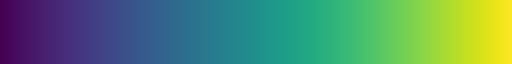

In [ ]:
# Set seaborn themes
sns.set_theme(style='white')
sns.color_palette('viridis', as_cmap=True)

In [ ]:
# To get a correlation matrix
# Ploting the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws={"size": 12}): Sets the font size of the annotation

# Create the plot
plt.figure(figsize=(10,6))
matrix = variableCorr
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(variableCorr,
           annot=True,
           linewidths=.5,
           cmap='viridis',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Between Features')
plt.show()

NameError: name 'variableCorr' is not defined

<Figure size 1000x600 with 0 Axes>

### Observations
- Are all the values the same color? This is called multicolinearity and indicates there are multiple independent variables that each have a strong relationship on each other. For instance if you are examining crime data categories such as robbery may also correlate to vehicular theft as the assailant was charged with both crimes. While they are independent crimes, they often occur together indicating a relationship. Multicolinear relationships complicate feature engineering for machine learning models and may need to have their dimensionality reduced (dropping columns or further subsets) to make sure the model trains well for those specific variables.

- Are specific variables correlated higher than others?
- Are there negative correlations indicating an inverse relationship in the variables? This indicates that as one variable is increasing, the other variable is decreasing. Negative correlations can be high (close to -1) or low (close to 0).
- Remember that correlation does not equal causation. Be careful with your wording when establishing relationships between the variables.
- Are there variables that lack correlation to any other variable? These are variables that may not be needed in the analysis and can be used to reduce the dimensionality of the data.

Additional Statistical methods are possible. Python is a mathematical programming language and can perform inferential statistics, hypothesis testing, probability distributions, and multivariate statistical analysis.

## Visualizations
Create Visualizations to aid in the interpretation of the data and answering of the research problem. Using Python plotting libraries seaborn, matplotlib, plotly, or bokeh multiple plots will be completed to see trends and insights in the data.
  - Use charts, graphs, maps, and other plots to answer questions related to your research question.
  - Bivariate analysis is the process of examing two variables to visualize their relationship. Choose variables from the correlation matrix to see how they affect each other.
  - Be sure to use the correct chart for the type of information you need.

### Choosing a Visualization
The factors for data visualizations have multiple factors to consider when selecting the plot best suited to display the data.
- <u>The type of data</u>: <br>
The type of data you are working with will dictate the type of visualization that is most appropriate. For example, if you have categorical data, you might use a bar chart or a pie chart. If you have numerical data, you might use a line chart or a scatter plot.

- <u>The number of variables</u>: <br>
If you are visualizing only one variable, you have more flexibility in terms of the type of visualization you can use. However, if you are visualizing multiple variables, you need to choose a visualization that can effectively show the relationships between the variables.

- <u>The goal of the visualization</u>: <br>
What do you want the visualization to achieve? Do you want to show trends over time? Do you want to compare different groups of data? Do you want to show the distribution of data? The goal of your visualization will help you to choose the right type of visualization.

- <u>The audience</u>: <br>
Who is the audience for your visualization? Are they familiar with data visualization? Do they have a technical background? The audience for your visualization will affect the complexity and level of detail that you use.

- <u>Available tools</u>: <br>
What libraries do you have access to? There are many different visualization libraries available for Python, such as Matplotlib, Seaborn, and Plotly. The software you have access to will affect the types of visualizations that you can create.

- <u>Use multiple visualizations</u>:<br>
It is often helpful to use multiple visualizations to show different aspects of your data. This can help to tell a more complete story and to make the data more understandable.

- <u>Make sure the visualization is clear and concise</u>:<br>
The visualization should be easy to understand at a glance. The labels should be clear and the colors should be consistent.

- <u>Your own preferences</u>:<br>
 Ultimately, the best visualization is the one that you think is most effective and visually appealing. Don't be afraid to experiment with different types of visualizations until you find one that you like.

### Guide to Stunning Visualizations
It is important that the visualizations created also display content that keep the reader engaged in the research.
- <u>Use a consistent style</u>:<br> Once you have chosen a visualization, use a consistent style throughout your visualization. This will make your visualization look more professional and polished.

- <u>Label your axes</u>:<br>
Always label your axes with clear and concise labels. This will help your audience understand what the visualization is showing.

- <u>Use a legend</u>:<br>
If your visualization uses multiple colors or shapes, use a legend to identify what each color or shape represents.

- <u>Annotate your visualization</u>:<br>
Use annotations to highlight important features of your visualization. This can help your audience understand the data more easily.

In [ ]:
# Set Plotly themes
# Javascript Interactive Visualization (computationally expensive)
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [ ]:
# Set Bokeh themes
# bokeh.palettes.Viridis256
import bokeh as bk
from bokeh.layouts import column
from bokeh.plotting import figure, output_file, show, curdoc
from bokeh.io import output_notebook, push_notebook, show
from bokeh.models import Scatter, ColumnDataSource, Div, RangeSlider, Spinner, CustomJS
# apply theme to current document
curdoc().theme = 'light_minimal'

In [ ]:
# Generate Box and Whisker chart
# Import matplot lib to generate chart
import matplotlib.pyplot as plt
labels = DataFrameCols

# Build the plot:
# two rows of three plots each
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True)

# first plot, row 1 column 1
axs[0, 0].boxplot(DataFrameName['Column Name1'])
axs[0, 0].set_title('Column Name1')

# second plot, row 1 column 2
axs[0, 1].boxplot(DataFrameName['Column Name2'])
axs[0, 1].set_title('Column Name2')

# third plot, row 1 column 3
axs[0, 2].boxplot(DataFrameName['Column Name3'])
axs[0, 2].set_title('Column Name3')

# fourth plot, row 2 column 1
axs[1, 0].boxplot(DataFrameName['Column Name4'])
axs[1, 0].set_title('Column Name4')

# fifth plot, row 2 column 2
axs[1, 1].boxplot(DataFrameName['Column Name5'])
axs[1, 1].set_title('Column Name5')

# sixth plot, row 2 column 3
axs[1, 2].boxplot(DataFrameName['Column Name6'])
axs[1, 2].set_title('Column Name6')

# Designate scale
for ax in axs.flat:
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
plt.show()

### Observations: Boxplot
The boxplots show the presence of outliers beyond the top whiskers with a narrow data spread and a large number of upper outliers.

**Column Name1**
- The minimum value is:
- The maximum value is:
- The median value is:
- The mean value is:
<br>

**Column Name2**
- The minimum value is:
- The maximum value is:
- The median value is:
- The mean value is:
<br>

**Column Name3**
- The minimum value is:
- The maximum value is:
- The median value is:
- The mean value is:
<br>

**Column Name4**
- The minimum value is:
- The maximum value is:
- The median value is:
- The mean value is:
<br>

**Column Name5**
- The minimum value is:
- The maximum value is:
- The median value is:
- The mean value is:
<br>

**Column Name6**
- The minimum value is:
- The maximum value is:
- The median value is:
- The mean value is:

In [ ]:
# Group data by variable1 and calculate the average percentage of variable2 for each variable1
# Syntax: averageVariable1 = DataFrame.groupby('variable1')['variable2'].mean()

# Sort variable1 based on the highest average percentage of variable2
# Syntax: maxVariable1 = averageVariable1.sort_values(ascending=False).head(50)

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(maxVariable1.index, maxVariable1.values)
plt.xlabel('variable1')
plt.ylabel('Average Percentage of variable2')
plt.title('variable1 with Highest Average Percentage of variable2')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
# Show the visualization
plt.show()

### Observations: Scatter Plot
Each visualization should have a summary of the findings.

In [ ]:
# Create an averages table
variable_avg = DataFrame.groupby('Variable').mean().sort_values(by='sortingVariable',ascending=False)
variable_avg

# Create visualization
fig = px.bar(variable_avg,
             x="State Population",
             y=variable_avg.index,
             color=variable_avg.index,
             orientation='h',
             height=1000,
             title='Plot Title')

fig.show()

### Observations: Bar Chart
Each visualization should have a summary of the findings.

 ### Research Question: Insert Primary Research Question Here
Explain how the technique this visualization uses describes the research question.

In [ ]:
# Create visualization
fig  = px.scatter(DataFrame,x='VariableName',
                  y = 'VariableName2',
                  title = 'Average VariableName versus Average VariableName2 by Hue',
                  color = VariableVariationByColor.index)
fig.show()

#### Observations
Each visualization should have a summary of the findings.

### Research Question: Insert Secondary Research Question Here
Explain how the technique this visualization uses describes the research question.

In [ ]:
# Create visualization
fig = px.line(DatFrame, x="Variable1",
              y="Variable2",
              color="Variable3",
              title='Chart Title')
fig.show()

#### Observations
From this visualization, we observe the following:
  - Observations from your visualization should be described here.

### Research Question: Insert Tertiary Research Question Here
Explain how the technique this visualization uses describes the research question.

In [ ]:
# Create visualization
fig = px.pie(DataFrame, values= 'Variable1',
             names=DataFrame.index,
             height=1000,
             title='Chart Title')
fig.show()

In [ ]:
# Create visualization
fig = px.pie(DataFrame, values= 'Variable1',
             names=DataFrame.index,
             height=1000,
             title='Chart Title')
fig.show()

# Data Preparation:






To successfully prepare data for a well-fitting machine learning model, the data must be appropriately cleaned, handling any missing data, error corrections, and removing redundancy from duplication or irrelevant data. The cleaned data is essential for training steps that determine the performance of the model's predictive capability. <br>
<br> **Data preprocessing:**<br>
Data preprocessing includes data normalization, data standardization, categorical variable coding, and outlier handling. These steps help to prepare the data for machine learning algorithms by making it more consistent and easier to understand.<br>
<br> **Feature engineering:**<br>
Feature engineering is creating new features from existing ones. This can be done to improve the machine learning model's performance by making the features more relevant to the target variable.<br>
<br> **Data splitting:**<br>
Once the data is prepared, it is important to split it into training, validation, and testing sets. The training set is used to train the model, the validation set is used to fine-tune the model, and the testing set is used to evaluate the model's performance.<br>
<br> **Model selection:**<br>
Once the data is split, selecting it is time a machine learning model . A variety of machine learning models are available, each with its own strengths and weaknesses. The best model for your specific problem will depend on the data type you have and your analysis goals.<br>
<br> **Model training:**<br>
Once you have selected a model, it is time to train it. This involves feeding the training set to the model and allowing it to learn the relationships between the features and the target variable.<br>
<br> **Model evaluation:**<br>
Once the model is trained, it is vital to evaluate its performance on the validation set. This will help you determine whether the model is performing well enough for new data.<br>
<br> **Model deployment:**<br>
Once the model is evaluated and deemed performing well, it can be deployed to production. This means making the model available to users so that they can use it to make predictions.


# Data Modeling:
Model Selection












When selecting a machine learning model, it is also essential to consider the limitations of these models. Machine learning models are only as good as the data on which they are trained. If the data is not representative of the population being studied, then the analysis results may be biased. Additionally, machine learning models can be sensitive to changes in the data. The machine learning model must be updated if the data changes over time. Despite these limitations, machine learning can be a powerful tool for analyzing historical trends in data over time. Using machine learning, researchers can gain insights into the factors contributing to data trends and identify disparities or discrepancies. This information can be used to develop policies that help to reduce the impact of disparaties and make key insights, decision-making to generate equality.

Identify factors that contribute to higher disparaties in populations. This could be done by using machine learning to identify correlations between factors contributing to discrepancies. A Support Vector Machine is a supervised learning model that can be used for classification and regression tasks. In disparaties in population analysis, support vector machines could predict the number of people affected in a given year, using the key features and other factors unrelated to race and ethnicity. While key features highly correlate  to the data, it is important to remember correlation is not causation.

Data modeling can be used to predict future trends in disparaties in the data. This could be done by using historical data to train a machine-learning model to predict how the disparaties in population will likely change. This information could inform policy decisions about disparaties in funding, staffing, and capacity. A logistic regression model can be used to predict the probability of an event occurring based on historical data. This model type is currently used as a heavily biased algorithm to predict the likelihood of an event occurring in association with the data. In the context of disparaties in population analysis, logistic regression can be used with other modeling techniques to introduce early interventions for rehabilitation or reduction of anticipated outcomes.

Machine learning can be used to identify patterns in the data that suggest which factors are most likely to lead to disparaties.  This information could then be used to develop interventions and programs that help to reduce negative outcomes. Decision trees are non-parametric machine learning models that can be used to classify data. In the context of disparaties in population analysis, decision trees could be used to identify the factors most predictive of key features. This information could be used to develop policies that help to reduce the number of people in disparaties and undesirable outcomes.

Machine learning algorithms can be used to make connections to analagous features affecting data indirectly. By using machine learning to identify patterns in the data that correlate with analagous variables, interventions, and programs could then be developed that help to address those variables, reducing the effect on the key features explored in the data. Machine learning could automate some of the tasks currently performed by humans, freeing up resources to focus on other tasks, such as providing remediation services. Using a Random forest as an ensemble learning model combines multiple decision trees to improve accuracy. In disparaties in population analysis, random forests could enhance the accuracy of predictions made by logistic regression or decision trees, helping decide on rehabilitation and prevent future disparaties.

Machine learning  can determine the impacts on communities. This information could then be used to develop policies and programs that help mitigate adverse effects. Through analysis and visualization, the disparaties in populations have documented correlations. Understanding the impact the disparaties in population using machine learning identifies any discrepancies represented in the data. This information could inform policy decisions about reducing disparaties.


# Model Evaluation:  
How would you evaluate your results?



Several key metrics can be used to evaluate a machine learning model. Some of the most important metrics include:

- *Accuracy:* The percentage of predictions that the model makes correctly.
- *Precision:* The proportion of true positives that the model predicts correctly. It measures how good the model is at avoiding false positives.
- *Recall:* the proportion of true positives that the model predicts. It measures how good the model is at avoiding false negatives.
- *F1 score:* This measure of accuracy and recall considers both. This is a weighted harmonic mean of precision and recall. It is a more comprehensive measure of the model's performance than either precision or recall alone.
- *Area under the ROC curve (AUC):* This measures the model's ability to distinguish between positive and negative examples. It is a more robust metric than accuracy for imbalanced datasets.
- *MCC (Matthews correlation coefficient):* This metric measures the accuracy of a classification model. It is more robust to class imbalance than accuracy.

The specific metrics considered will depend on the particular application of the model. For example, if the model is being used to predict whether someone will commit a crime, then accuracy and AUC may be the most critical metrics. However, precision and recall may be more meaningful if the model is used to identify the factors most predictive of types of crime.  For example, metrics should focus on accuracy, precision, and recall if the model is used to predict criminal recidivism. However, if the model is used to identify fraud, the focus is on metrics such as AUC. If the research question requires minimizing the number of false positives, then the focus is on the precision metric. However, if the need is to reduce the number of false negatives, focus on the recall metric. Suppose the research question seeks to identify individuals at risk of re-offending. In that case, you focus on the recall metric, as the goal is to identify as many people as possible who are at risk.

It is also essential to consider the limitations of these metrics. Accuracy, precision, recall, and F1 score can all be misleading if the data is imbalanced. For example, if there are many more negative examples than positive examples, then the model may achieve high accuracy even if it is not very good at predicting positive examples. AUC is less sensitive to imbalanced data, but it is still essential to consider the distribution of the data when interpreting this metric. Precision and recall can be misleading if the cost of false positives and false negatives is not equal. AUC-ROC is not as sensitive to class imbalance as accuracy, but it can be misleading if the classes are imbalanced. MCC is a more robust metric than accuracy, precision, and recall, but it is less commonly used.

It is also essential to consider the limitations of models. Some machine models can be sensitive to outliers and noise in the data. Additionally, some models, such as SVM models, can be computationally expensive to train. In addition to these metrics, it is also important to consider the following factors when evaluating a machine learning model:

* **Complexity:** The complexity of the model can affect its performance and interpretability.
* **Interpretability:** The interpretability of the model can be important for understanding how it works and making decisions based on its predictions.
* **Robustness:** The robustness of the model can be necessary for ensuring that the model performs well on new data.
By considering these factors, you can better evaluate the performance of a support vector machine learning model and make informed decisions about how to use the model.


# Model Deployment:
Where would you deploy this personal model and whom would you want to see it?


The key stakeholders who might be interested in using machine learning models to analyze the data include:

- Policymakers: Policymakers can use machine learning models to gain insights into the factors contributing key features and identify disparities. This information can be used to develop policies that help to reduce the number of people affected by inequities and make the system more fair. Policymakers may include local, tribal, state, and federal governments.
- Researchers: Researchers can use machine learning models to conduct empirical studies on the effects of the data on individuals, families, and communities. This research can inform public policy and advocacy efforts.
- Civil rights organizations: Civil rights organizations can use machine learning models to identify disparities in social systems and advocate for reforms. These organizations can help ensure the social system treats everyone with equity. Advocacy groups, such as the ACLU and the NAACP, could use machine learning models to raise awareness of the inequities and advocate for reform.
- Non-profit Action Groups: These are organizations with the mission to raise awareness and take action against the disparities of society. The missions of non-profit action groups are to effect change in current social structures,  education, inequitable disbursement of resources across racial and ethnic demographics, and the harmful treatment of vulnerable populations with limited rights.

*Identify three key stakeholders to whom you would deploy the data.*
  
  - StakeholderName: https://www.webaddress.org/: Brief description of the stakeholder and how your data relates to their current mission.
  - StakeholderName: https://www.webaddress.org/: Brief description of the stakeholder and how your data relates to their current mission.
  - StakeholderName: https://www.webaddress.org/: Brief description of the stakeholder and how your data relates to their current mission.

These key stakeholders might be interested in using machine learning models to analyze the data inequity rates. The stakeholders who are most interested in the work will depend on the specific goals of the analysis. It is important to note potential risks associated with using machine learning models to analyze sensitive data sets. For example, if the models are improperly trained or evaluated, they could be biased or inaccurate, particularly when the model is trained on imbalanced data featuring demographics such as race and ethnicity. Additionally, the analysis results could be used to justify discriminatory practices and deepen systemic racism. It is essential to be aware of these risks and to take steps to mitigate them. For example, ensure models are trained on a representative dataset and that they are evaluated using a variety of metrics. Additionally, the limitations of the models and the potential for bias should be transparent at the beginning of the analysis.

# Presentation Modality
When presenting the results of your analysis as a Data Scientist there are two additional documents that are used, the Executive Summary and a visual presentation. These documents do not have to be created from scratch, there is a Python library, **pandoc** that will export the information from your notebook into multiple formats. Before you begin the library must be installed and updated to the latest format.

Install will install the most current version of pandoc in the Jupyter or Colab environment:

    pip install pandoc

Upgrade will install the most current version of pandoc in the Jupyter or Colab environment:

    pip install --upgrade pandoc

You will need to make sure `nbconvert` is installed to use the feature:

    pip install nbconvert
    
The full documentation for pandoc can be read here: https://pandoc.org/MANUAL.html. Pandoc is reading the Python file and exporting into a format that is readable by text editors and presentation viewers. The export is not perfect, the documents should always be reviewed and editied to ensure the quality of information being presented.

To get started, open a terminal window on your computer or within Jupyter Notebooks terminal. The next step is to navigate to the folder where the .ipynb file is located. Now run the following line of code, replacing the filenames with those you need and naming the new file however is needed. Remember that naming conventions matter, the text editor file does not need to have the same name as the .ipynb notebook file, choose an appropriate name.

For a Word document suitable for editing in Microsoft Word or Google Docs:

    pandoc jupyter_file.ipynb -s -o new_word_file.docx

For slide presentation file with speaker notes follow the instructions listed in the Developer Documents for `nbconvert` which can be read here: [Creating Slides with Speaker Notes from Jupyter Notebooks.](https://nbconvert.readthedocs.io/en/latest/usage.html#:~:text=js%3A%20SlidesWithNotesExample.-,Example%3A%20creating%20slides%20w/%20speaker%20notes,-%23)

Alternatively each individual markdown block can be selected from edit mode and the information copied and pasted into the desired document. This process is time consuming and should only be used when the amount of information to be copied is a few code cells.
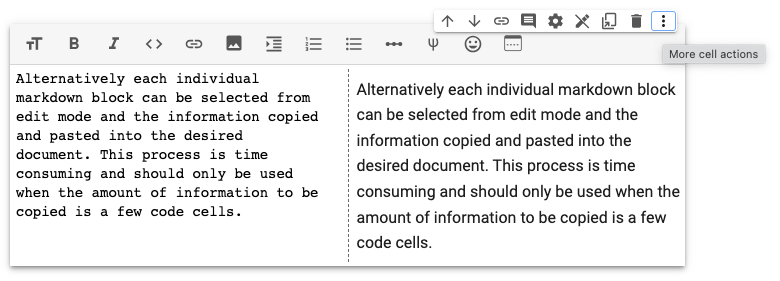

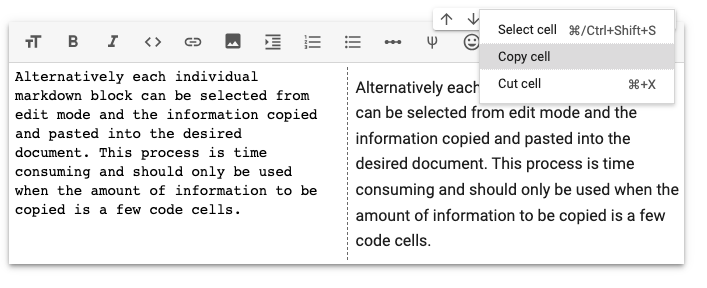

For charts, tables, plots, and figures created in your Notebook you can manually select them by selecting the elipses for the code cell and **View Output Fullscreen** This option chooses to see the plot in a new window.
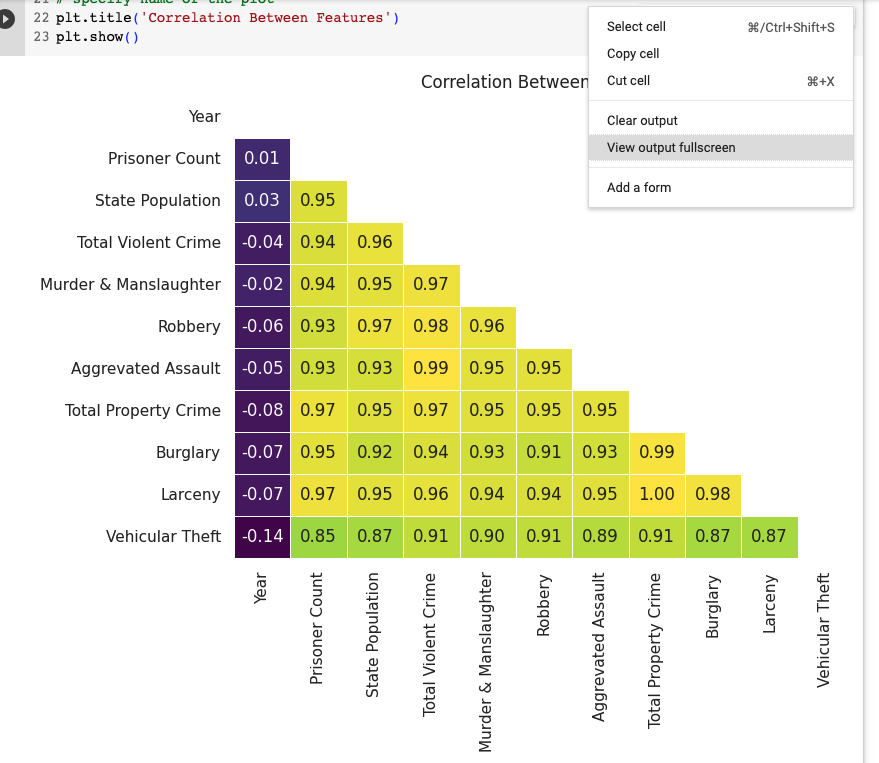

From the fullscreen window, usually within a new tab in a web browser, you can right-click (control+click on Mac) to open an options window. From there select to save the image.
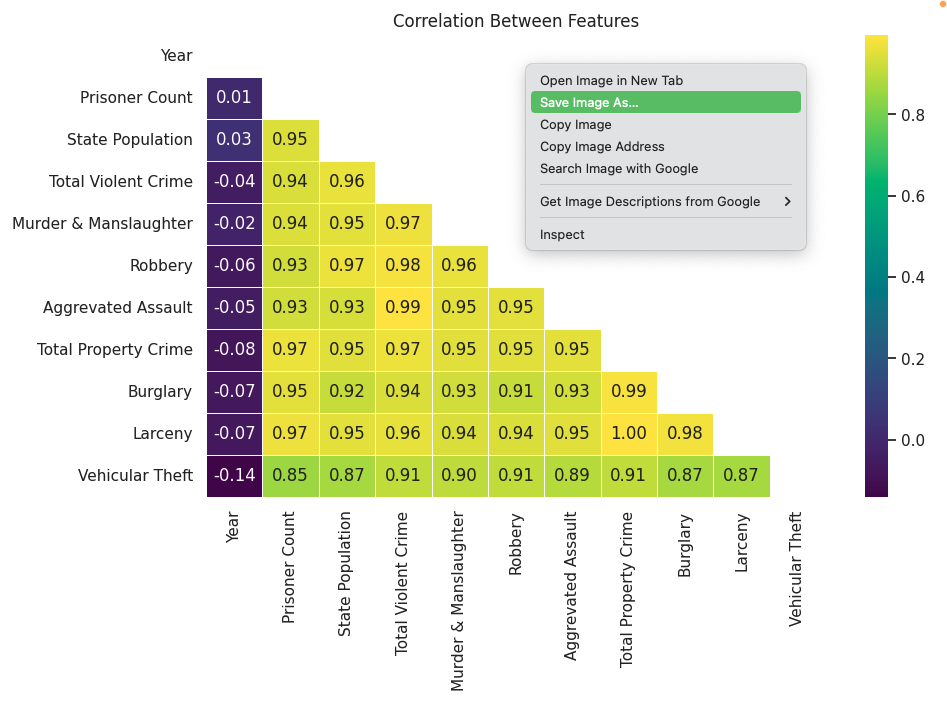

# Resources and References:
## Non-Profit Organizations and Non-Governmental Organizations
* The Natural Resources Defense Council: What Is Environmental Racism? https://www.weforum.org/agenda/2020/07/what-is-environmental-racism-pollution-covid-systemic/
* Green Action: Environmental Justice & Environmental Racism. http://greenaction.org/what-is-environmental-justice/
* New Mexico Department of Health: Environmental Justice Definitions. https://www.nmhealth.org/publication/view/help/309/
Oxford Reference: Environmental racism - Oxford Reference. https://www.oxfordreference.com/view/10.1093/oi/authority.20110803095753679
* World Economic Forum (Jul 2020): What is Environmental Racism And How Can We Fight It? | World Economic Forum. https://www.weforum.org/agenda/2020/07/what-is-environmental-racism-pollution-covid-systemic/
* Center for Public Integrity Environmental racism persists, and the EPA is one reason why. https://publicintegrity.org/environment/pollution/environmental-justice-denied/environmental-racism-persists-and-the-epa-is-one-reason-why/

## Federal, State, Local Government
* United States Environmental Protection Agency (epa.gov) Environmental Justice-Related Terms As Defined Across the PSC Agencies. https://www.epa.gov/sites/default/files/2015-02/documents/team-ej-lexicon.pdf
* United States Environmental Protection Agency (epa.gov). Environmental Justice Key Terms. https://sor.epa.gov/sor_internet/registry/termreg/searchandretrieve/glossariesandkeywordlists/search.do?details=&glossaryName=Env%20Justice%20Key%20Terms

## Peer-Reviewed Journal Research
* Payne-Sturges DC, Gee GC, & Cory-Slechta DA. (2021). Confronting racism in environmental health sciences: moving the science forward for eliminating racial inequities. Environmental health perspectives. 129(5). https://doi.org/10.1289/ehp8186.

* Southerland VA, Anenberg SC, et al. (2021). Assessing the distribution of air pollution health risks within cities: a neighborhood-scale analysis leveraging high-resolution data sets in the bay area, California. Environmental health perspectives, 129(3), https://doi.org/10.1289/ehp7679.

* Lee YG, Lee PH, Choi SM, An MH, Jang AS. (2021) Effects of Air Pollutants on Airway Diseases. Int J Environ Res Public Health.  Sep 20;18(18):9905. https://doi.org/10.3390%2Fijerph18189905.

* Moore, SA, Roth, RE, et al. (2019). Undisciplining environmental justice research with visual storytelling. Geoforum, 102, 267-277. https://doi.org/10.1016/j.geoforum.2017.03.003

* Moore, A.L. (2017) An examination of the influence of environmental justice policy, Executive Order 12898, on the spatial concentration of manufacturing facilities in EPA Region 6 1988-2009. J Environ Stud Sci 7, 377–385. https://doi.org/10.1007/s13412-017-0425-x

* Sorensen-Allacci M & Magder R. (2014) Walking in the shoes of another: assessing the boundaries of an environmental justice community and cumulative risk exposure through collaborative research, Journal of Urbanism: International Research on Placemaking and Urban Sustainability, 7:1, 23-44, https://doi.org/10.1080/17549175.2013.860908

* Shmool, J.L., Kubzansky, L.D., Dotson Newman, O. et al. (2014). Social stressors and air pollution across New York City communities: a spatial approach for assessing correlations among multiple exposures. Environ Health 13, 91. https://doi.org/10.1186/1476-069X-13-91

* Burwell-Naney, K., Zhang, H., Samantapudi, A. et al. (2013). Spatial disparity in the distribution of superfund sites in South Carolina: an ecological study. Environ Health 12, 96 . https://doi.org/10.1186/1476-069X-12-96

* Raysoni, A. U. et al. (2013). Characterization of traffic-related air pollutant metrics at four schools in El Paso, Texas, USA: Implications for exposure assessment and siting schools in urban areas. Atmospheric Environment, 80, 140-151. https://doi.org/10.1016/j.atmosenv.2013.07.056

* Wilson SM et al. (2013). Leaking Underground Storage Tanks and Environmental Injustice: Is There a Hidden and Unequal Threat to Public Health in South Carolina?. Environmental Justice. Volume: 6 Issue 5 175-182.http://doi.org/10.1089/env.2013.0019

* Jayajit Chakraborty (2012) Cancer risk from exposure to hazardous air pollutants: spatial and social inequities in Tampa Bay, Florida, International Journal of Environmental Health Research, 22:2, 165-183, https://doi.org/10.1080/09603123.2011.628643

* Maroko, A. R. (2012). Using air dispersion modeling and proximity analysis to assess chronic exposure to fine particulate matter and environmental justice in New York City. Applied Geography, 34, 533-547. https://doi.org/10.1016/j.apgeog.2012.02.005

* Norman, L. M., Villarreal, M. L., Lara-Valencia, F., Yuan, Y., Nie, W., Wilson, S., Amaya, G., & Sleeter, R. (2012). Mapping socio-environmentally vulnerable populations access and exposure to ecosystem services at the U.S.–Mexico borderlands. Applied Geography, 34, 413-424. https://doi.org/10.1016/j.apgeog.2012.01.006

* Sacoby M. Wilson et al. (2012) Assessment of the Distribution of Toxic Release Inventory Facilities in Metropolitan Charleston: An Environmental Justice Case Study. American Journal of Public Health 102, no. 10 : pp. 1974-1980. https://doi.org/10.2105/AJPH.2012.300700

* Maantay, J. (2002). Mapping environmental injustices: pitfalls and potential of geographic information systems in assessing environmental health and equity. Environmental health perspectives, 110(suppl 2), 161-171. https://doi.org/10.1289%2Fehp.02110s2161

* Holifield, R. (2001). Defining environmental justice and environmental racism. Urban geography, 22(1), 78-90.  https://doi.org/10.2747/0272-3638.22.1.78